In [26]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import weatherbench2 as wb
import sys, os
sys.path.append('/users/mfeldman/code/xarray_parcel/')
print(sys.path)
import modules.parcel_functions as parcel
print('modules loaded')

['/users/mfeldman/code/AI-storm/devel', '/users/mfeldman/.conda/envs/wb/lib/python310.zip', '/users/mfeldman/.conda/envs/wb/lib/python3.10', '/users/mfeldman/.conda/envs/wb/lib/python3.10/lib-dynload', '', '/users/mfeldman/.conda/envs/wb/lib/python3.10/site-packages', '$HOME/code/xarray_parcel/', '$HOME/code/xarray_parcel/', '$HOME/code/xarray_parcel/', '$HOME/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/', '/users/mfeldman/code/xarray_parcel/']
modules loaded


In [48]:
## DATA PATHS ON GOOGLE CLOUD
#tigge_path='gs://weatherbench2/datasets/ens/2020-1440x721.zarr/' -> only 3 pressure levels
#era_5_fcst='gs://weatherbench2/datasets/era5-forecasts/2020-1440x721.zarr' -> only 3 pressure levels
hres='gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr'
era5='gs://weatherbench2/datasets/era5/1959-2022-6h-1440x721.zarr'
pangu='gs://weatherbench2/datasets/pangu/2018-2022_0012_0p25.zarr'

In [49]:
tigge=xr.open_zarr(pangu)

In [50]:
print(tigge)

<xarray.Dataset>
Dimensions:                  (time: 3652, prediction_timedelta: 40,
                              latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                 (latitude) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * level                    (level) int64 1000 925 850 700 ... 200 150 100 50
  * longitude                (longitude) float32 0.0 0.25 0.5 ... 359.5 359.8
  * prediction_timedelta     (prediction_timedelta) timedelta64[ns] 06:00:00 ...
  * time                     (time) datetime64[ns] 2018-01-01 ... 2022-12-31T...
Data variables:
    10m_u_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_wind_speed           (time, prediction_timedelta, latitude, longitude) float32 dask.array<chunksize=(1, 1, 721, 1440)

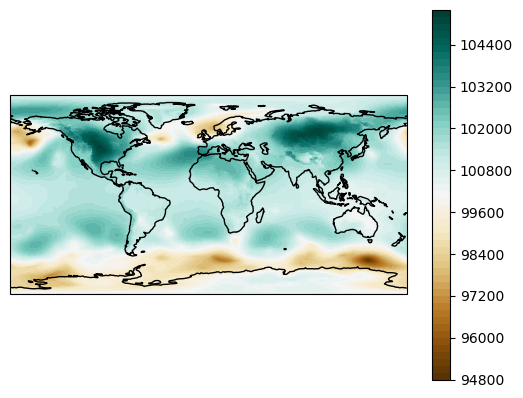

In [51]:
from cartopy import config
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
mslp=tigge.mean_sea_level_pressure[0,0,:,:]
p=plt.contourf(tigge.longitude, tigge.latitude, mslp, 60,
             transform=ccrs.PlateCarree(),cmap='BrBG')
plt.colorbar(p)
#plt.imshow(tigge.mean_sea_level_pressure[0,1,0,:,:])
ax.coastlines()

plt.show()

In [52]:
tigge.time

<xarray.DataArray 'time' (time: 3652)>
array(['2018-01-01T00:00:00.000000000', '2018-01-01T12:00:00.000000000',
       '2018-01-02T00:00:00.000000000', ..., '2022-12-30T12:00:00.000000000',
       '2022-12-31T00:00:00.000000000', '2022-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 ... 2022-12-31T12:00:00